# 06: Linear models

In [50]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mylib as my

# Linear regression
Here we have $n$ examples each with $m$ features. For a single example $(\mathbf{x}, y)$ The linear regression model is written as:
$$h(\mathbf{x}) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m$$
where $w_0, w_1, \cdots, w_m$ are the weight parameters we are trying to learn. 

NOTE: In the multidimensional case, we have a regression hyperplane instead of a regression line. 

We can express this model for a single example using the matrix notation like this:

$$h(\mathbf{x}) = \mathbf{w}^T \mathbf{x}$$

For the entire training dataset, we have:
$$h(\mathbf{X}) = \mathbf{X} \mathbf{w}$$


### Using the normal equation
Using the $L_2$ loss function which is defined as:

$$L_2 = \frac{1}{2} \sum_{i=1}^n (y^{(i)} - h(\mathbf{x}^{(i)}))^2 = \frac{1}{2} \sum_{i=1}^n (y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)})^2$$
     
or in matrix notation as:
    $$L_2 = \frac{1}{2} (\mathbf{y} - h(\mathbf{X}))^T(\mathbf{y} - h(\mathbf{X})) = \frac{1}{2} (\mathbf{y} - \mathbf{X} \mathbf{w})^T(\mathbf{y} - \mathbf{X} \mathbf{w})$$

We can use the following equation to find the weight parameters $\mathbf{w}$ that minimize the loss equation $L_2$:

$$ \mathbf{w}  = (\mathbf{X}^T \mathbf{X} )^{-1} \mathbf{X}^T \mathbf{y}$$


In [51]:
class LinearRegressor:
    def __init__(self, dataset):
        self.ds = dataset
        
    def fit(self):
        X = np.concatenate((np.ones((self.ds.N, 1)), self.ds.inputs), axis=1)
        y = self.ds.target.ravel()
        self.w = np.dot(np.linalg.pinv(X), y)

    def predict(self, unseen):
        if unseen.ndim == 1:
            x = np.insert(unseen, 0, 1) # adding the bias weight
            return np.dot(x, self.w)
        else:
            return np.array([self.predict(ex) for ex in unseen])

Let's test it. First we create a sample dataset:

In [52]:
x = np.arange(0, 15, .1)
y = 2 * x + 2 + np.random.normal(loc=2, scale=5, size=len(x))

df = pd.DataFrame({'x': x, 'y': y})
data = my.DataSet(df, y=True)

x,y

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
        11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
        12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
        13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
        14.3, 14.4, 14.5, 14.6, 14.7, 

Let's plot this data:

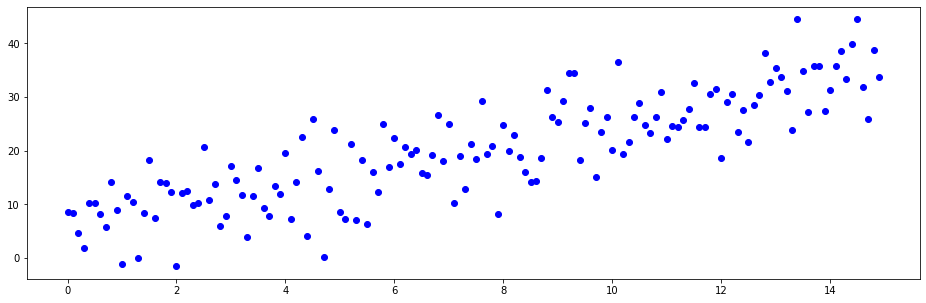

In [53]:
# plottong
fig = plt.figure(figsize=(16,5))
plt.scatter(x, y, color='b', marker='o')

Let's fit this data using the above linear regression:

In [54]:
lg = LinearRegressor(data)
lg.fit()

print (lg.w)

[5.77166836 1.93042092]


And here is the regression line:

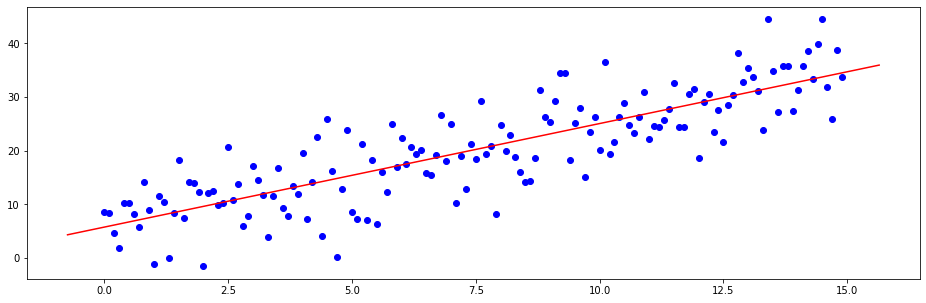

In [55]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color='b', marker='o')

x1, x2 = ax.get_xlim()

input = np.array([[x1], [x2]])
output = lg.predict(input)

ax.plot((x1, x2), output.ravel(), 'r-')

### Using gradient descent
Given a loss function $L(\mathbf{w})$, we can try to find $\mathbf{w}$ that minimizes the loss function using gradient descent:

$$\mathbf{w} = \mathbf{w} - \eta \nabla L(\mathbf{w})$$

where $\eta$ is the learning rate and $\nabla L(\mathbf{w})$ is the gradient (a vector of partial derivatives one for each $w_i$).

For a single weight $w_i$ given a single example $(\mathbf{x}, y)$.

$$w_i = w_i - \eta \frac{\delta L(\mathbf{w})}{\delta w_i}$$
If $L$ is $L_2$ then:
$$w_i = w_i - \eta \frac{\delta\ \ \frac{1}{2}(y - \mathbf{w}^T \mathbf{x})^2}{\delta w_i}$$

which gives us the update rule:
$$w_i = w_i + \eta (y - \mathbf{w}^T \mathbf{x}) x_i$$

In [56]:
class GDLinearRegressor:
    def __init__(self, dataset, eta=.0001, epochs=10, random_state=17):
        self.ds = dataset
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self):
        X = np.concatenate([np.ones(self.ds.N).reshape(self.ds.N, 1), self.ds.inputs], axis=1)
        n = X.shape[0]
        m = X.shape[1]
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=m).reshape(m, 1)
        
        self.loss_hist = []
        for e in range(self.epochs): 
            predicted = np.dot(X, self.w)
            error = self.ds.target - predicted
            loss = (1/n) * np.dot(error.T, error) # dividing by n to scale the cost down
            self.loss_hist.append(loss[0,0] / n) 
            self.w = self.w + (self.eta) * np.dot(X.T, error)
    
    def predict(self, unseen):
        if unseen.ndim == 1:
            x = np.insert(unseen, 0, 1) # adding the bias weight
            return np.dot(x, self.w)
        else:
            return np.array([self.predict(ex) for ex in unseen])

Let's test it using the same dataset as above:

In [57]:
gd = GDLinearRegressor(data)
gd.fit()

print(gd.w)

[[0.45829469]
 [2.46533623]]


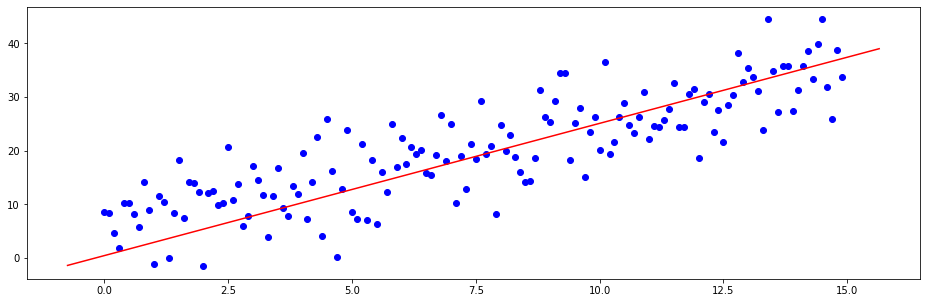

In [58]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x, y, color='b', marker='o')

x1, x2 = ax.get_xlim()

input = np.array([[x1], [x2]])
output = gd.predict(input)

ax.plot((x1, x2), output.ravel(), 'r-')

### The learning curve
Here a plot showing how our gradient descent implementation behave as number of epochs grows (an epoch is a one pass over the entire training dataset).

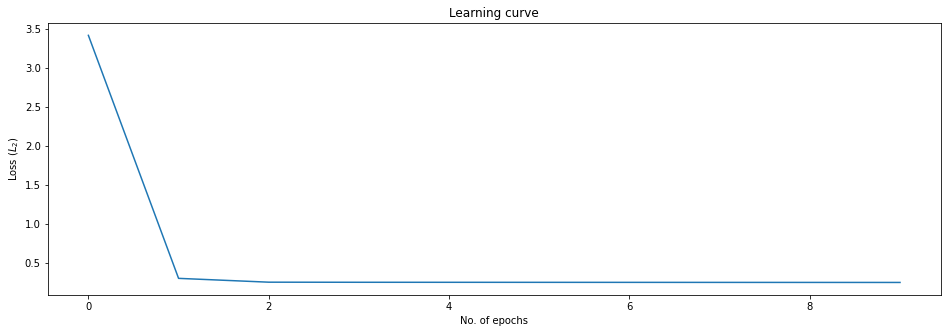

In [59]:
gd = GDLinearRegressor(data)
gd.fit()

fig = plt.figure(figsize=(16, 5))

plt.title('Learning curve')
plt.xlabel('No. of epochs')
plt.ylabel('Loss ($L_2$)')
plt.plot(gd.loss_hist)

### Changing epochs and $\eta$
And we can even plot the regression lines after various numbers of epochs (an epoch is a one pass over the entire training dataset). 

When the learning rate $\eta$ is just about right, the convergence happens quickly.

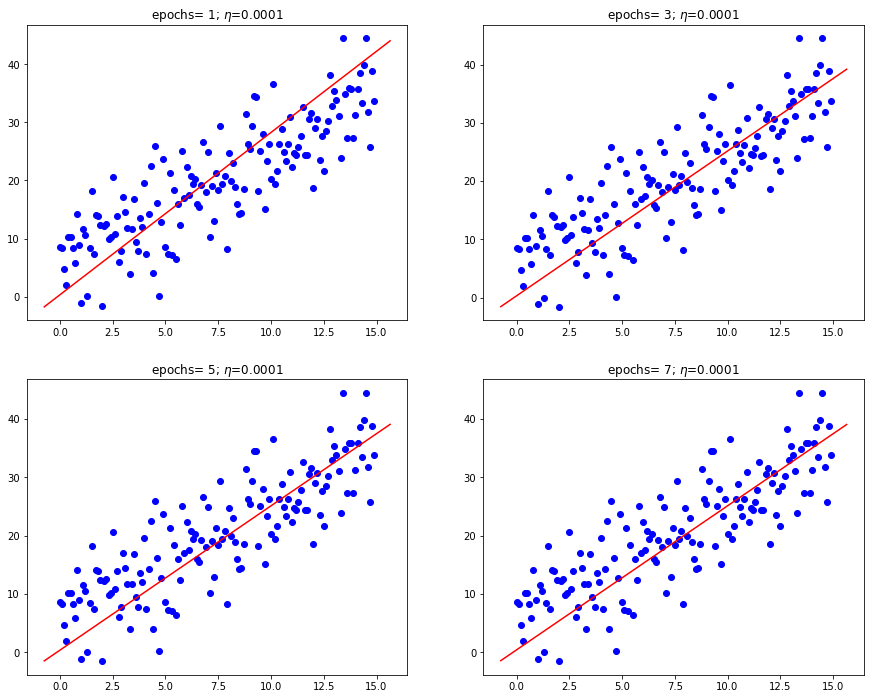

In [60]:
fig = plt.figure(figsize=(15,25))
n = 4
eta = 0.0001
for i in range(n):
    gd = GDLinearRegressor(data, eta=eta, epochs=2 * i + 1)
    gd.fit()
    ax = fig.add_subplot(n, 2, i + 1)
    ax.scatter(x, y, color='b', marker='o')

    x1, x2 = ax.get_xlim()

    input = np.array([[x1], [x2]])

    output = gd.predict(input)

    ax.plot((x1, x2), output.ravel(), 'r-')
    plt.title(f'epochs= {2 * i + 1}; $\eta$=0.0001')

When the learning rate $\eta$ is small, the convergence takes more epochs.

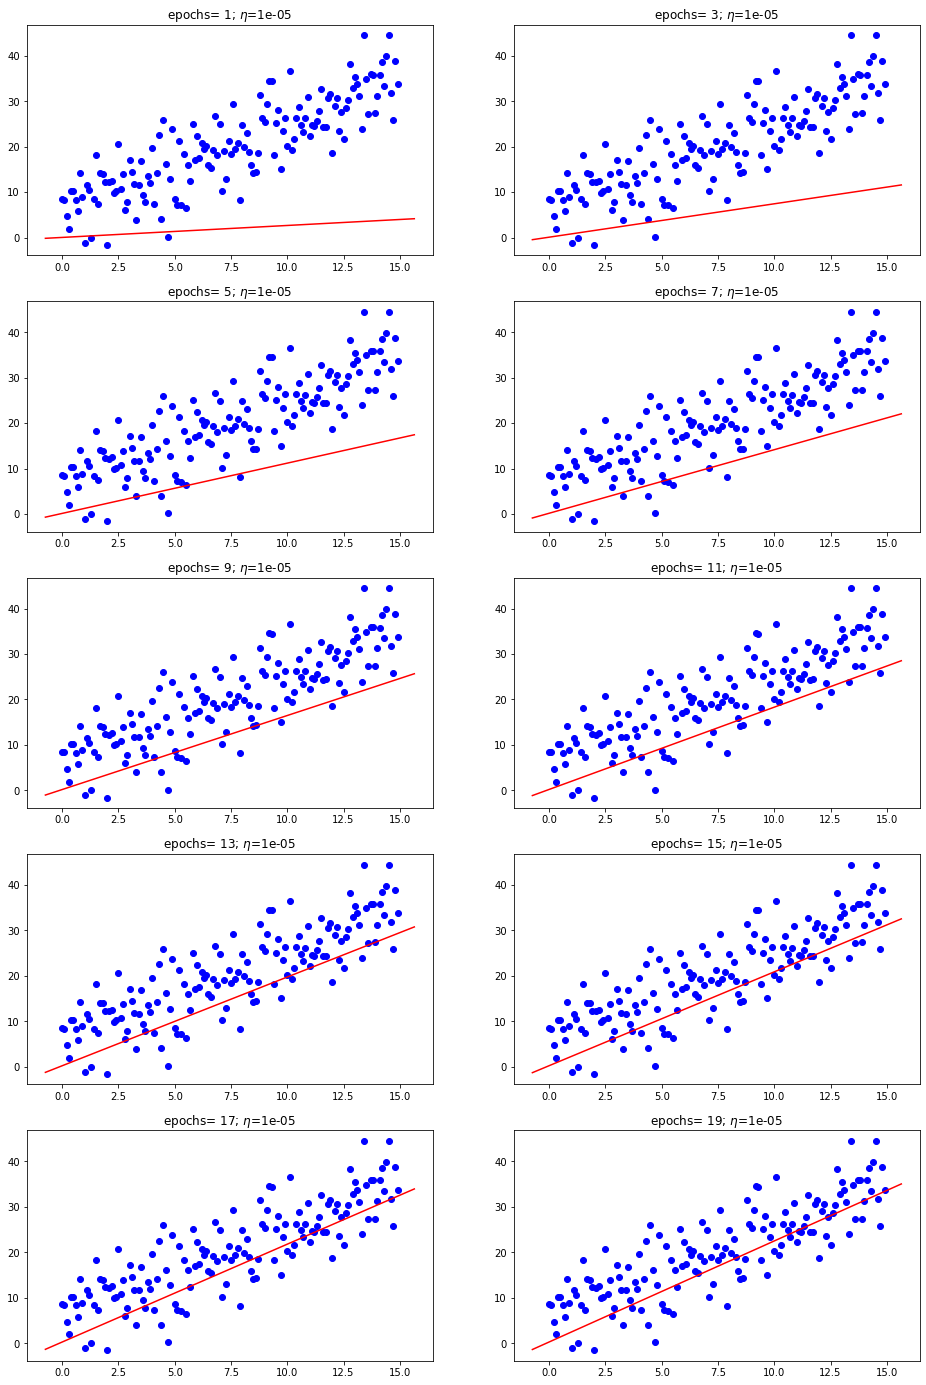

In [61]:
fig = plt.figure(figsize=(16,50))
n = 10
eta = 0.00001
for i in range(n):
    gd = GDLinearRegressor(data, eta=eta, epochs=2 * i + 1)
    gd.fit()
    ax = fig.add_subplot(n, 2, i + 1)
    ax.scatter(x, y, color='b', marker='o')

    x1, x2 = ax.get_xlim()

    input = np.array([[x1], [x2]])

    output = gd.predict(input)

    ax.plot((x1, x2), output.ravel(), 'r-')
    plt.title(f'epochs= {2 * i + 1}; $\eta$={eta}')

And here is it when the learning rate $\eta$ is too large.

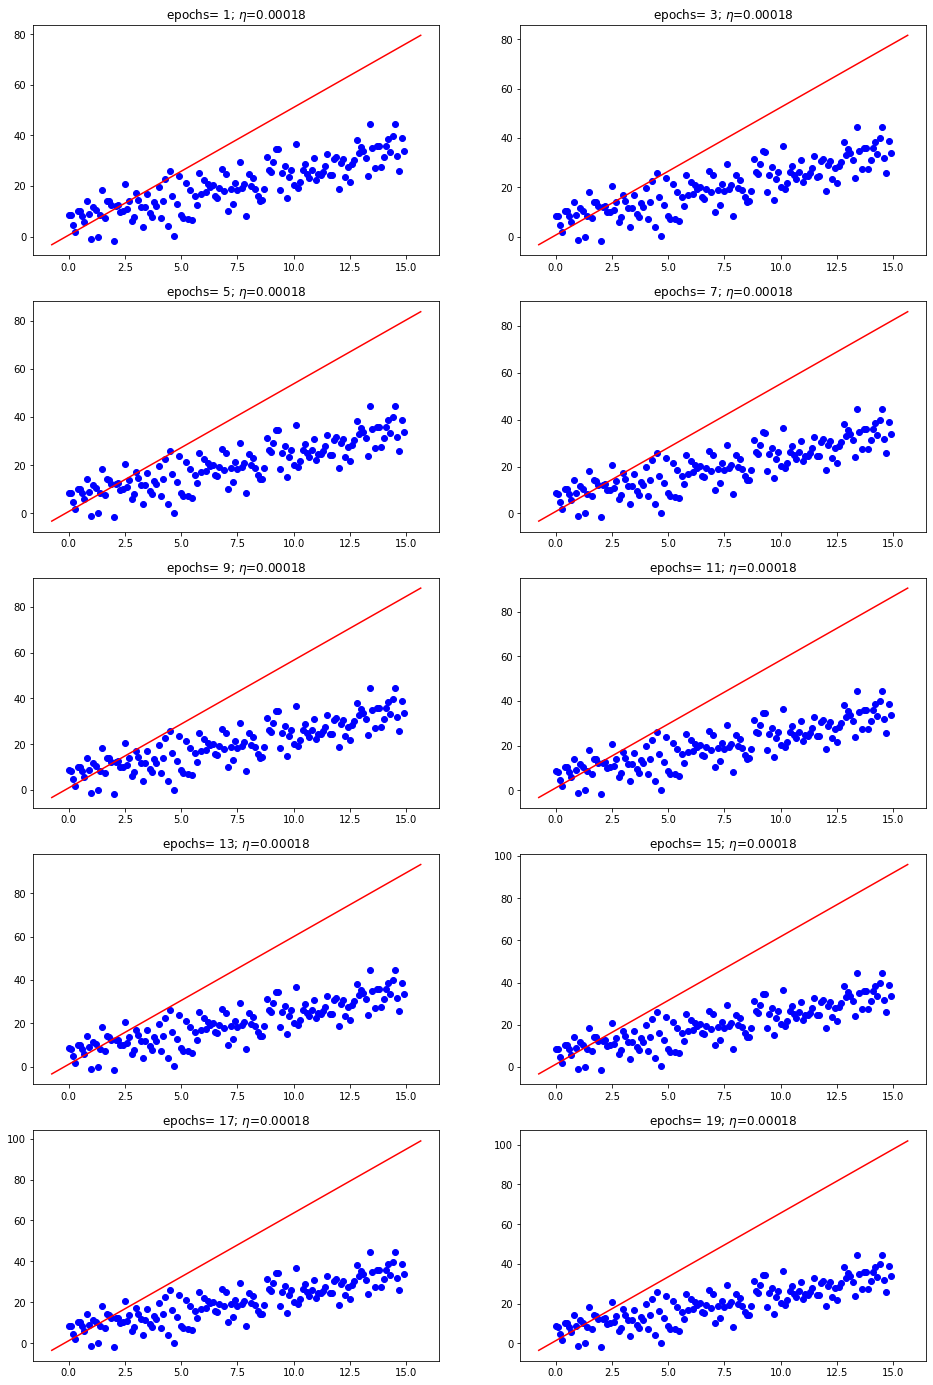

In [62]:
fig = plt.figure(figsize=(16,50))
n = 10
eta = 0.00018
for i in range(n):
    gd = GDLinearRegressor(data, eta=eta, epochs=2 * i + 1)
    gd.fit()
    ax = fig.add_subplot(n, 2, i + 1)
    ax.scatter(x, y, color='b', marker='o')

    x1, x2 = ax.get_xlim()

    input = np.array([[x1], [x2]])

    output = gd.predict(input)

    ax.plot((x1, x2), output.ravel(), 'r-')
    plt.title(f'epochs= {2 * i + 1}; $\eta$={eta}')

## CHALLENGE A
Take the above plots where $\eta$ is too big and draw next to each plot its corresponding learning curve.

In [63]:
# TODO

## Logistic regression

We can write $h(\mathbf{X})$ as:

$$ h(\mathbf{X}) = g(\mathbf{X} \mathbf{w}) = g(z)$$

For linear regression:
$$ g(z) = z $$

and for logistic regression:
$$ g(z) = \frac{1}{1 + e^{-z}} $$

where $g$ is the **logistic** or **sigmoid** function, which is defined as:

$$ h(\mathbf{X}) = \frac{1}{1 + e^{- \mathbf{X} \mathbf{w}}} $$

This means that $h(\mathbf{X}) \in [0, 1]$, which means that it can be interpreted as a probability:
 
 
$$ p(y | \mathbf{x}; \mathbf{w}) = {\begin{cases}h(\mathbf{x})& {\text{ if }}y = 1\\1 - h(\mathbf{x})&{\text{ if }} y = 0\end{cases}} $$

which can be written as:
$$ p(y | \mathbf{x}; \mathbf{w}) = h(\mathbf{x})^y (1 - h(\mathbf{x}))^{1 - y} $$

In addition, given the sigmoid function $$ g(z) = \frac{1}{1 + e^{-z}}$$
    
it can be shown that:

$$g'(z) = \frac{d}{dz} \frac{1}{1 + e^{-z}} = g(z) (1 - g(z))$$

In [64]:
class LogisticRegressor:
    def __init__(self, dataset, eta=.0001, epochs=10, random_state=17):
        self.ds = dataset
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self):
        X = np.concatenate([np.ones(self.ds.N).reshape(self.ds.N, 1), self.ds.inputs], axis=1)
        n = X.shape[0]
        m = X.shape[1]
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=m).reshape(m, 1)
        for i in range(self.epochs): 
            z = np.dot(X, self.w)
            h = self.sigmoid(z)
            self.w = self.w + self.eta * np.dot(X.T, (self.ds.target - h))

        self.loss_hist = []
        for e in range(self.epochs): 
            predicted = np.dot(X, self.w)
            error = self.ds.target - predicted
            loss = (1/n) * np.dot(error.T, error) # dividing by n to scale the cost down
            self.loss_hist.append(loss[0,0] / n) 
            self.w = self.w + (self.eta) * np.dot(X.T, error)
            
    def predict(self, unseen, threshold=.5):
        """ Returns probabilites unless a valid threshold is given"""
        if unseen.ndim == 1:
            x = np.insert(unseen, 0, 1) # adding the bias weight
            
            if threshold != None and 0.0 < threshold < 1.0:
                return 1 if self.sigmoid(np.dot(x, self.w)) >= threshold else 0
            else:
                return self.sigmoid(np.dot(x, self.w))
        else:
            return np.array([self.predict(ex, threshold) for ex in unseen])

    

Let's generate some binary classification data:

In [65]:
n = 150
data = np.array([[3, 14],[10, 9]])
d0 = np.concatenate((data[0,0] + np.random.normal(loc=1, scale=2.8, size=(n, 1)), 
                data[0, 1] + np.random.normal(loc=1, scale=1.2, size=(n, 1)), np.zeros(n).reshape(n, 1)), axis= 1)

d1 = np.concatenate((data[1,0] + np.random.normal(loc=.5, scale=2.5, size=(n, 1)), 
                data[1, 1] + np.random.normal(loc=.5, scale=1, size=(n, 1)), np.ones(n).reshape(n, 1)), axis= 1)


d = np.concatenate((d0, d1), axis=0)
data = my.DataSet(pd.DataFrame(d, columns=['x1', 'x2', 'y']), y=True)

Here is what the generated data looks like:

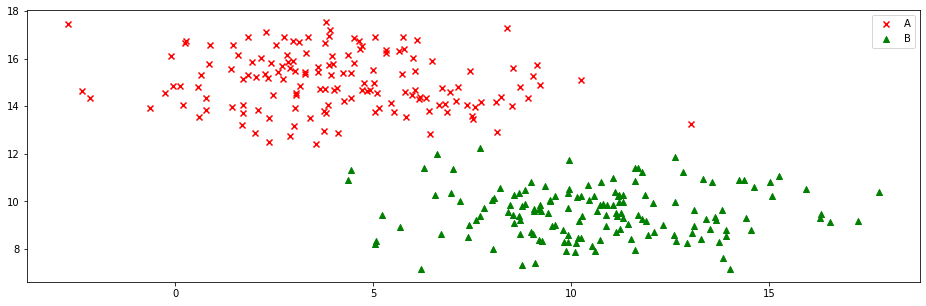

In [66]:
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)
a_ = data.examples[data.examples['y'] == 0].iloc[:, :-1].values
ax.scatter(a_[:, 0], a_[:, 1], color='red', marker='x', label='A')

b_ = data.examples[data.examples['y'] == 1].iloc[:, :-1].values
ax.scatter(b_[:, 0], b_[:, 1], color='green', marker='^', label='B')

ax.legend(loc='best')

We now split this data into training and test sets.

In [67]:
train, test = data.train_test_split(test_portion=0.33, shuffle=True)

We now can train our logistic regressor and display the learned weights.

In [68]:
logr = LogisticRegressor(train)
logr.fit()
print(logr.w)

[[ -376.46132102]
 [-2763.87930753]
 [-4739.41971211]]


which gives us the following confusion matrix and accuracy:

In [69]:
cm = my.confusion_matrix(train.target, logr.predict(train.inputs))
accuracy = np.trace(cm) / np.sum(cm)

print(cm)
print('Training accuracy: ', accuracy)

[[103   0]
 [ 98   0]]
Training accuracy:  0.5124378109452736


C:\Users\gardo\AppData\Local\Temp\ipykernel_7552\1186299855.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Here is the corresponding decision regions:

C:\Users\gardo\AppData\Local\Temp\ipykernel_7552\1186299855.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


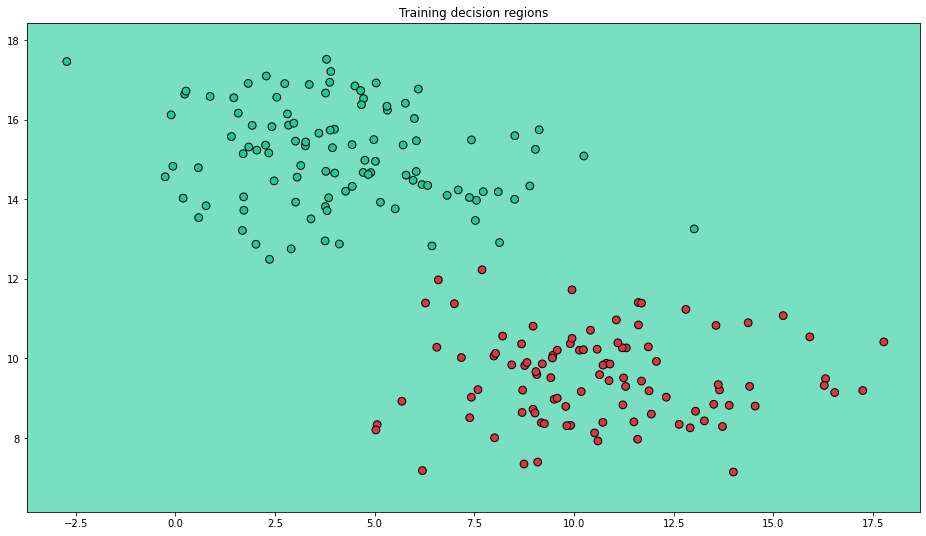

In [70]:
my.plot_decision_regions(train.inputs, train.target, logr, resolution=0.1, title="Training decision regions")

Let's now test our trained logistic model and plot the test decision regions:

C:\Users\gardo\AppData\Local\Temp\ipykernel_7552\1186299855.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


[[47  0]
 [52  0]]
Test accuracy:  0.47474747474747475


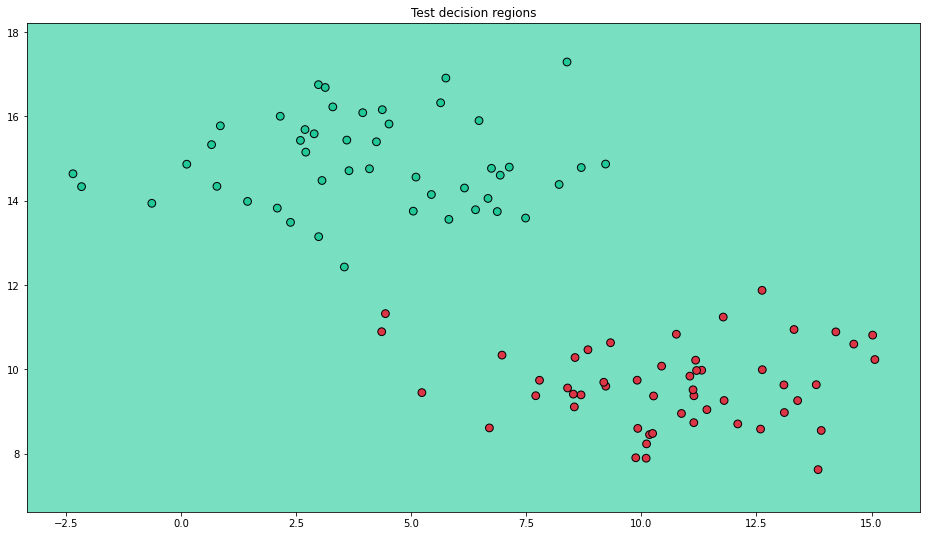

In [71]:
cm = my.confusion_matrix(test.target, logr.predict(test.inputs, threshold=.5))
accuracy = np.trace(cm) / np.sum(cm)

print(cm)
print('Test accuracy: ', accuracy)

my.plot_decision_regions(test.inputs, test.target, logr, resolution=0.1, title="Test decision regions")

## CHALLENGE B
Refactor the `LogisticRegressor` class above so as to make it possible to draw the learning curve (epochs vs loss). Test your revised class by drawing the learning curve of the above training set.

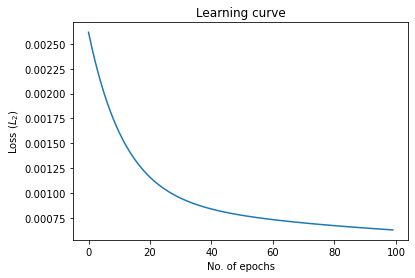

In [72]:
logr = LogisticRegressor(train, epochs=100,eta= 1E-6)
logr.fit()

fig = plt.figure()

plt.title('Learning curve')
plt.xlabel('No. of epochs')
plt.ylabel('Loss ($L_2$)') 
plt.plot(logr.loss_hist)